# *Imports*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# *Dataset*

In [2]:
df = pd.read_csv('..\datasets\Customers.csv')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\benso\AppData\Local\Temp\ipykernel_7940\3999121799.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\datasets\Customers.csv')


In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Verificar existência de *outliers*

<Axes: ylabel='Spending Score (1-100)'>

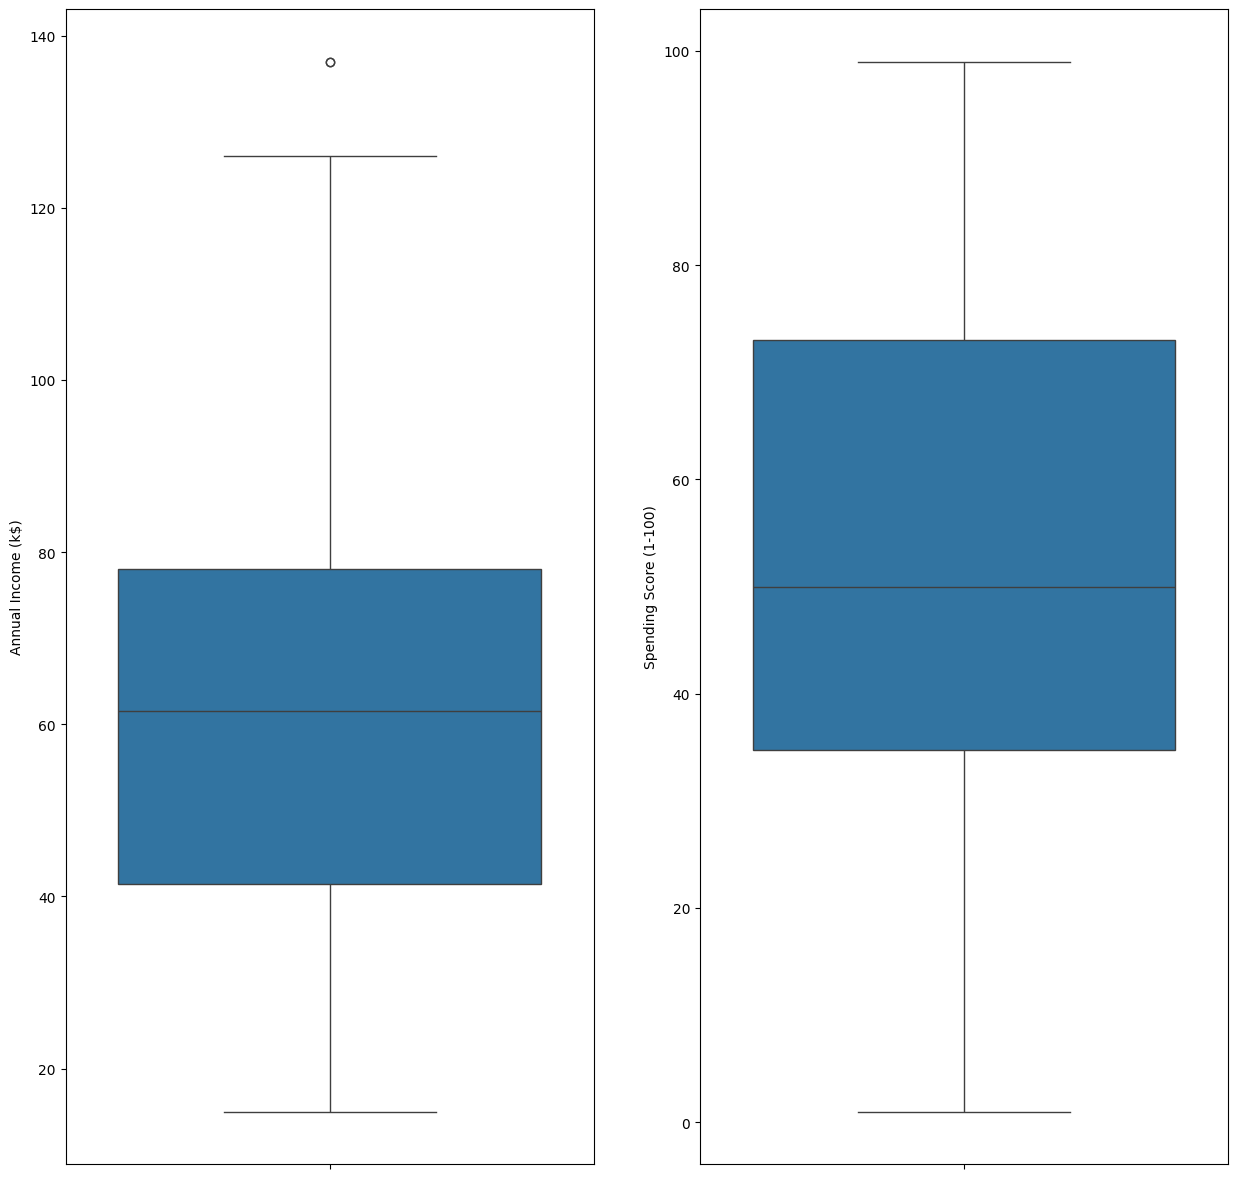

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'Annual Income (k$)')
plt.subplot(1,2,2)
sns.boxplot(data = df, y = 'Spending Score (1-100)')

In [7]:
# upper whisker = (78-41.5)*1.5+78 = 132.75

df[df['Annual Income (k$)'] > 132.75]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df = df[df['Annual Income (k$)'] <= 132.75]

In [9]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


## Univariate analysis - categorical data

### Verificar distribuição por gênero

Text(0.5, 0, 'Gênero')

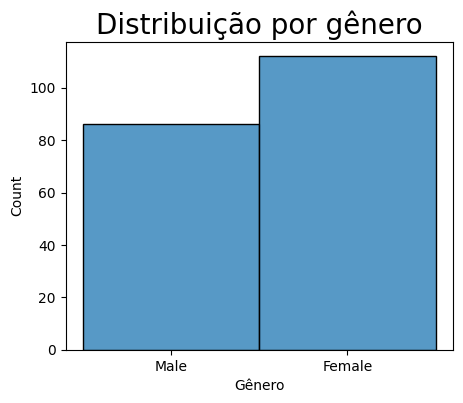

In [10]:
plt.figure(figsize=(5,4))
sns.histplot(df.Gender)
plt.title('Distribuição por gênero', fontsize=20)
plt.xlabel('Gênero', fontsize=10)

Conclusão:
- Mais clientes femininos do que masculinos

## Univariate analysis - numerical data

### Verificar distribuição por idades

Text(0.5, 9.444444444444438, 'Idade')

<Figure size 500x400 with 0 Axes>

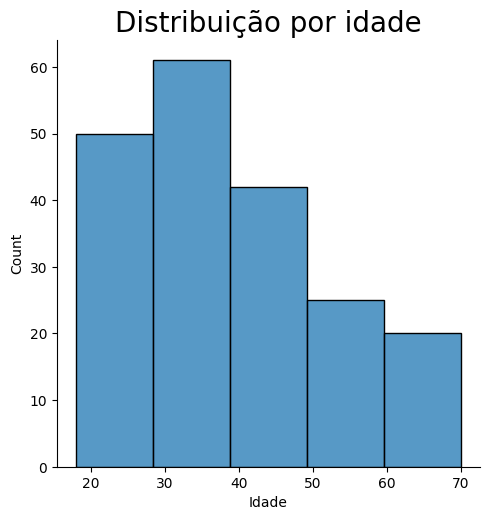

In [11]:
plt.figure(figsize=(5,4))
sns.displot(df.Age, binwidth=10)
plt.title('Distribuição por idade', fontsize=20)
plt.xlabel('Idade', fontsize=10)

Conclusão:
- Temos clientes com grande dispoersão de idades.
- A maioria tem entre 18 e 48 anos.

### Verificar distribuição por rendimento

Text(0.5, 9.444444444444438, 'Rendimento')

<Figure size 500x400 with 0 Axes>

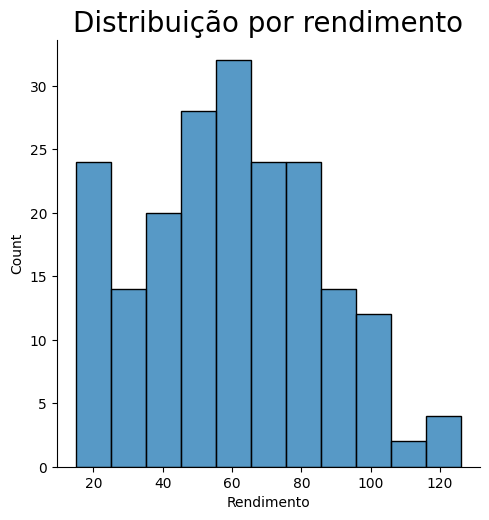

In [12]:
plt.figure(figsize=(5,4))
sns.displot(df['Annual Income (k$)'], binwidth=10)
plt.title('Distribuição por rendimento', fontsize=20)
plt.xlabel('Rendimento', fontsize=10)

Conclusão:
- A maioria dos clientes têm os rendimentos entre os 45 e os 85 mil dólares.
- Também temos um número considerável de clientes com rendimentos entre os 15 e os 25 mil dólares.

## Bivariate analysis - numerical-numerical data type

### *Spending score* vs Rendimento Anual

Text(0.5, 1.0, 'Rendimento anual vs Spending score')

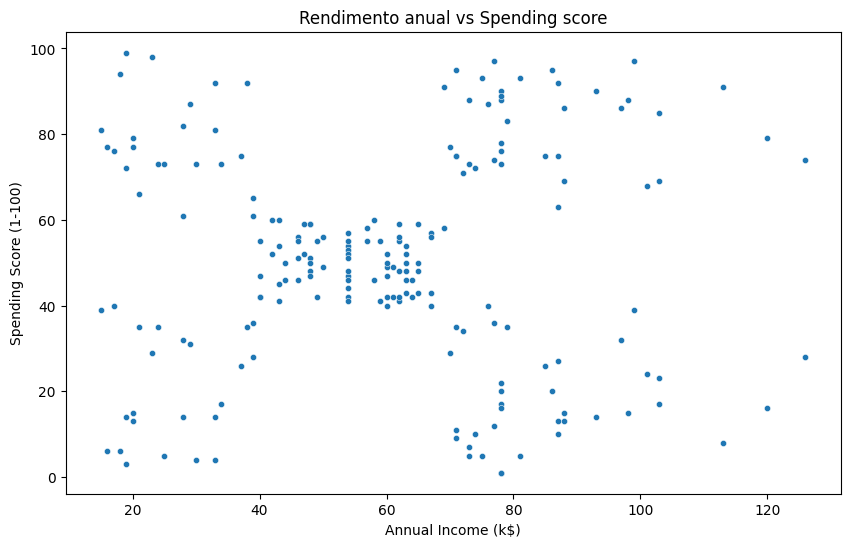

In [13]:
plt.figure(figsize=(10,6))

sns.scatterplot(data = df, x = 'Annual Income (k$)', y= 'Spending Score (1-100)', s=20)
plt.title("Rendimento anual vs Spending score")

# Pre-processing

## *Imports*

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
columns2scale = ["Annual Income (k$)", "Spending Score (1-100)"]

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df[columns2scale])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = columns2scale

df_scaled.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.779171,-0.435989
1,-1.779171,1.199413
2,-1.739447,-1.720949
3,-1.739447,1.043661
4,-1.699723,-0.397051


# Criar Modelo

In [16]:
from sklearn.cluster import KMeans

In [17]:
X = df_scaled[["Spending Score (1-100)", "Annual Income (k$)"]]

## Usar *elbow plot* para encontrar um nº ótimo de *clusters*

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, n_init = 10, init = 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

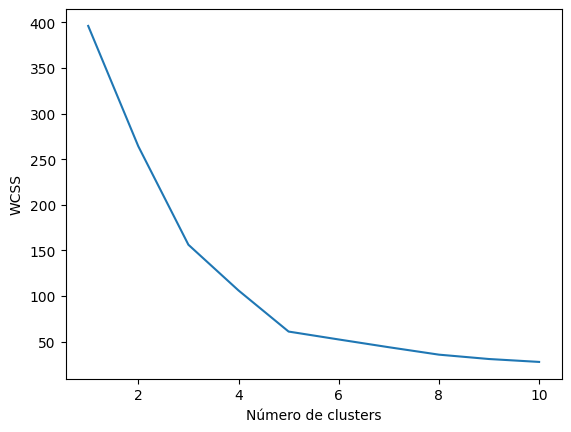

In [20]:
plt.plot(range(1,11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

Conclusão:
- O número ideal de *clusters* é 5.

# Treinar o KMeans

In [21]:
kmeans = KMeans(n_clusters = 5, n_init=10, init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [22]:
df['cluster'] = y_kmeans
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
193,194,Female,38,113,91,2
194,195,Female,47,120,16,1
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1


In [23]:
kmeans.cluster_centers_

array([[ 1.13569638, -1.35303699],
       [-1.27037859,  1.05488046],
       [ 1.24245028,  1.0098993 ],
       [-0.01886436, -0.18671971],
       [-1.14026225, -1.33011303]])

In [24]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids

array([[88.37727239, 15.44861661],
       [27.80806953, 77.28814249],
       [91.0646363 , 76.1329478 ],
       [59.31299782, 45.40168151],
       [31.08354646, 16.03734392]])

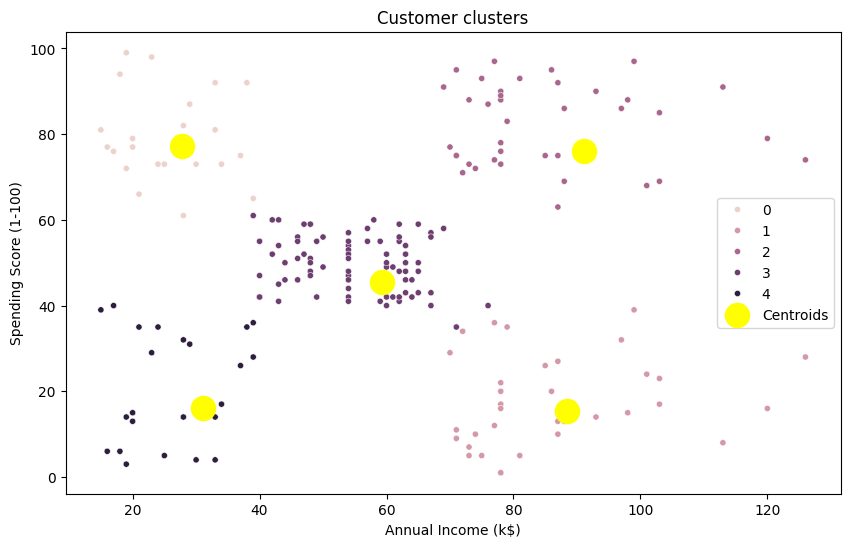

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue = 'cluster', s=20)

plt.scatter(centroids[:,0], centroids[:,1], s=300, c='yellow', label='Centroids')

plt.title('Customer clusters')
plt.legend()